In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['b', 'r', 'g', 'y']
TOL = 1.e-8

Метод Ньютона-Рафсона применен к f(z):
Возвращает найденный корень, начиная с начального предположения, z0 или False, если сходимость к допуску TOL не была достигнута в течение MAX_IT итераций.

In [5]:
def f(x):
    return x**4 -11*x**3+9*x**2+11*x-10

def fprime(x):
    return 4*x**3-33*x**2+18*x+11

def newton(z0, f, fprime, MAX_IT = 1000):
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):

Постройте фрактал Ньютона, найдя корни f(z).
Область, используемая для фрактального изображения, представляет собой область комплексной плоскости (xmin, xmax, ymin, ymax), где z = x + iy, дискретизированных на n значений вдоль каждой оси.

In [12]:
def plot_newton_fractal(f, fprime, n = 50, domain = (-10, 10, -10, 10)):

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    
    count = 0
    count_max_root = 0
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            if x**2+y**2 <= 100:
                count += 1
                r = newton(z0, f, fprime)
                if r is not False:
                    ir = get_root_index(roots, r)
                    m[iy, ix] = ir + 1    
                    if (ir == 2):
                        count_max_root += 1
                
    nroots = len(roots)
    
    if nroots > len(colors):               # Используйте «непрерывную» палитру, если корней слишком много.
        cmap = 'hsv'
    else:                                  # Используйте список цветов для палитры: по одному для каждого корня.
        cmap = ListedColormap(colors[:nroots])
        
    print(f'Area max root = {count_max_root/count}')    
    plt.imshow(m, cmap = cmap, origin = 'lower')
    plt.axis('off')
    plt.show()

Area max root = 0.02801080329009289


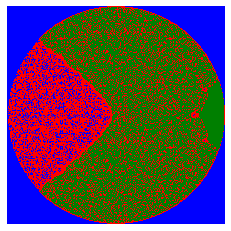

None


In [13]:
f = lambda x: x**4 -11*x**3+9*x**2+11*x-10
fprime = lambda x: 4*x**3-33*x**2+18*x+11

print(plot_newton_fractal(f, fprime, n = 500))